In [1]:
import charts_function_list
import os

In [5]:
base,data,outputs = charts_function_list.folder_setup()
os.chdir(data)
monuments = pd.read_csv('monuments.csv')

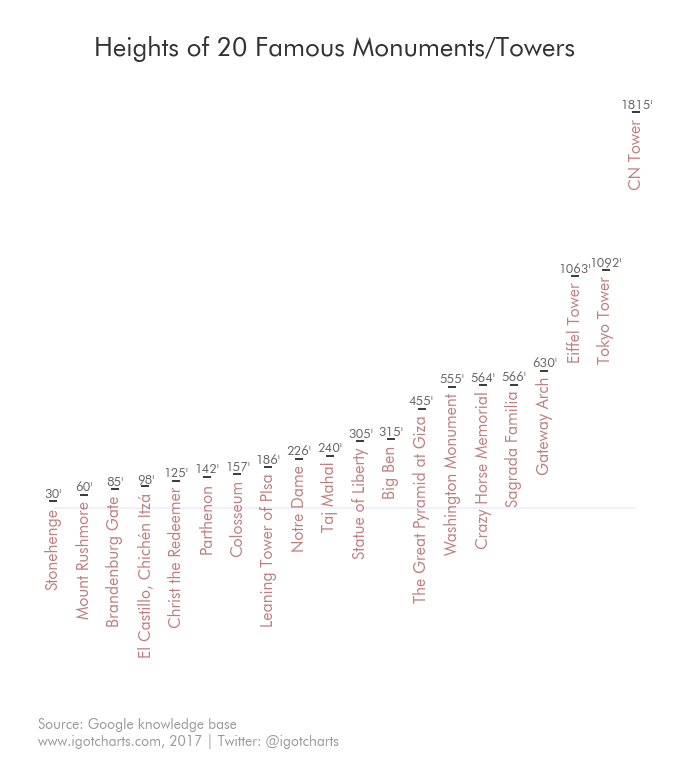

In [185]:
plt.rcParams["font.family"] = 'Futura Bk BT'
monument_chart = charts_function_list.chart_maker('Heights of 20 Famous Monuments/Towers',title_size=26)
monuments=monuments.sort_values(by='Height of object').reset_index(drop=True)

fig = monument_chart.initial_fig_axis((11,8))
ax = monument_chart.axes_set_up(fig)
plt.scatter(monuments.index,monuments['Height of object'],marker='_',color='black',s=50)
monument_chart.x_axis_setup(ax,-.5,19.5,interval=1)

for item in range(len(monuments)):
    ax.text(monuments.index[item],monuments['Height of object'][item]-25,
            monuments['Monument/Structure'][item],ha='center',rotation=90,va='top',fontsize=16,color='maroon',alpha=.5,zorder=2)
    
    ax.text(monuments.index[item],monuments['Height of object'][item]+20,str(monuments['Height of object'][item])+'\'',ha='center',fontsize=13,alpha=.6)

ax.set_xticks([])
ax.grid(False)
ax.set_yticklabels([])

ax.hlines(0,xmin=0,xmax=19,linewidth=.2,alpha=.6,color='blue')

monument_chart.tick_params_(ax)
monument_chart.citations(ax,source='Source: Google knowledge base',source_y=-.46)
os.chdir(outputs)
charts_function_list.chart_save('Monuments')
plt.show()